In [1]:
from tigermyo.utils import read_molli_dir, T1mapCal
from tigermyo.predict import predict_mask
from tigermyo.layering import layering, layering_percent 
from tigermyo.aha import get_ahaseg, get_aha17, draw_aha17
from tigermyo.registration import regToLast, regToLast2All, regToLast2T1starAB
from tigermyo.selector import selector
import matplotlib.pyplot as plt

Please enter FOLDER PATH below

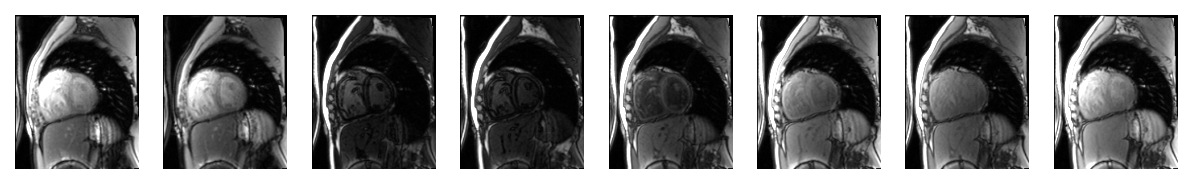

In [2]:
im, invtime = read_molli_dir("./"NONMOCOPATH"/")

plt.figure(figsize=(10,3), dpi=150)
for i in range(im.shape[0]):
    plt.subplot(1,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
plt.show()

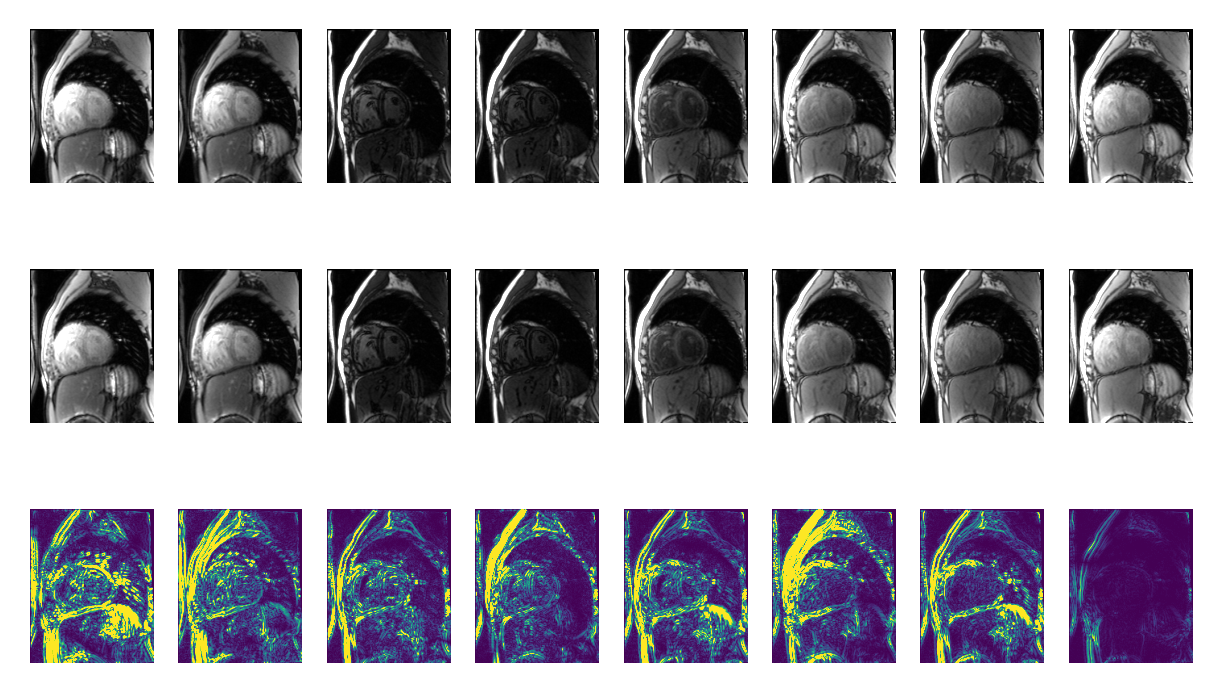

In [3]:
moco_im, invtime = read_molli_dir("./"MOCOPATH"/")

plt.figure(figsize=(5,3), dpi=300)
for i in range(moco_im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(moco_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(moco_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

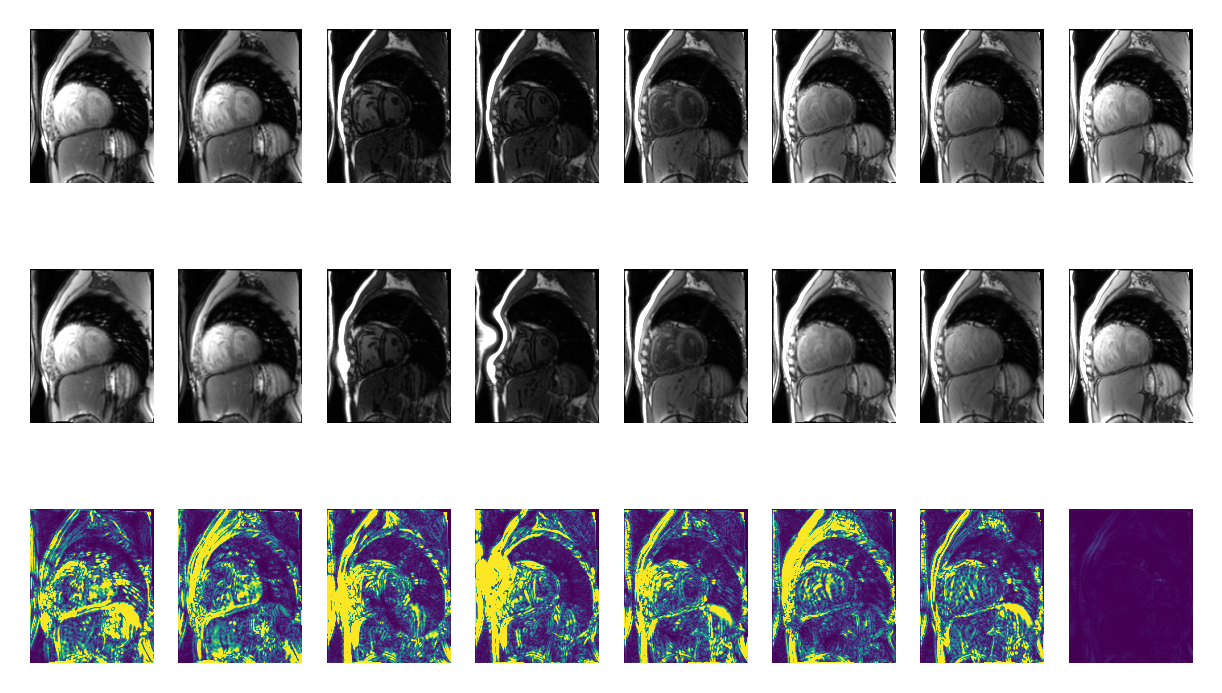

In [4]:
regedToLast_im = regToLast(im)

plt.figure(figsize=(5,3), dpi=300)
for i in range(im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(regedToLast_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(regedToLast_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

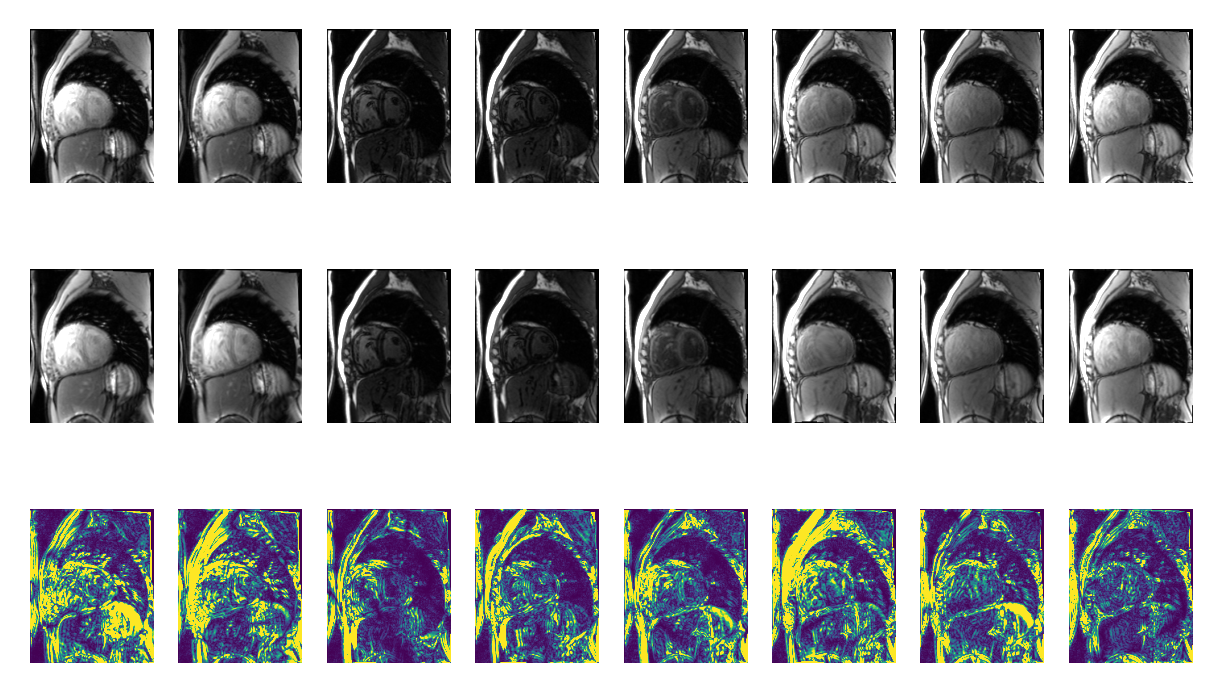

In [5]:
regedToLast2All_im = regToLast2All(im)

plt.figure(figsize=(5,3), dpi=300)
for i in range(im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(regedToLast2All_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(regedToLast2All_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

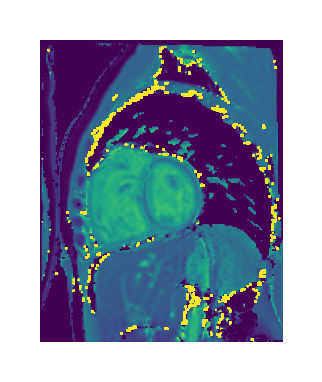

In [6]:
T1_dict = T1mapCal(im, invtime)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(T1_dict['T1map'], vmax=2500, vmin=300)
plt.show()

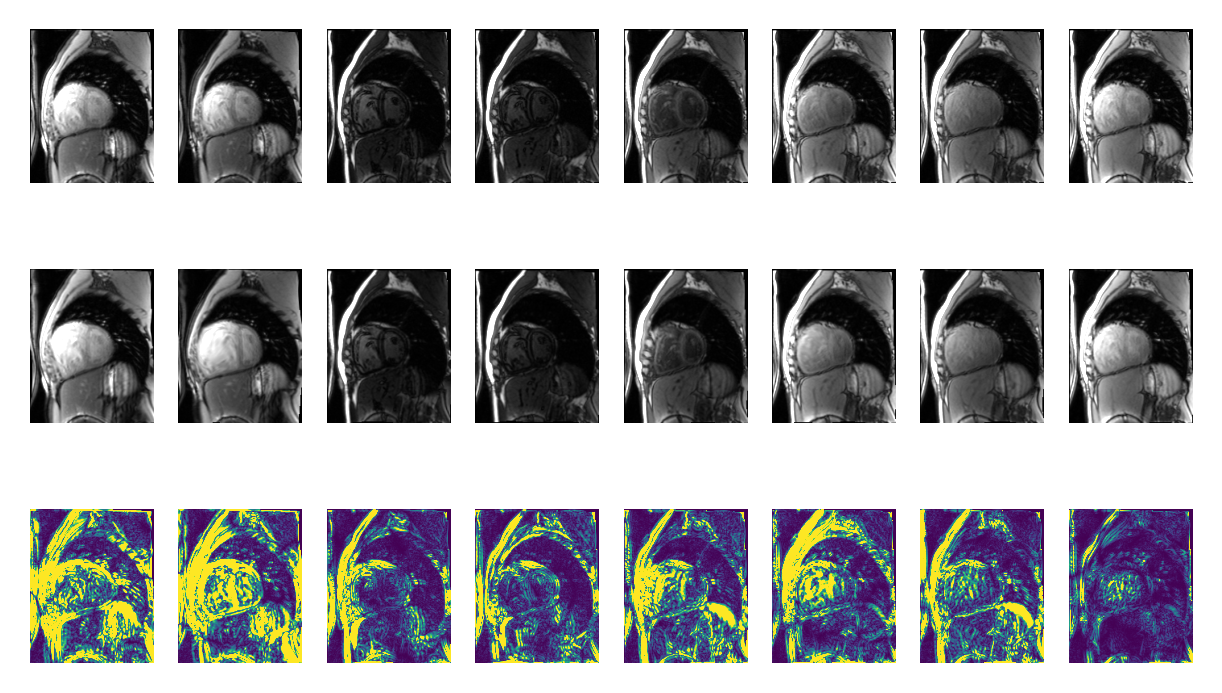

In [7]:
regedToLast2T1starAB_im = regToLast2T1starAB(im, invtime, T1_dict['Amap'], T1_dict['Bmap'])

plt.figure(figsize=(5,3), dpi=300)
for i in range(im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(regedToLast2T1starAB_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(regedToLast2T1starAB_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

In [8]:
reged_ims = [im, regedToLast_im, regedToLast2All_im, regedToLast2T1starAB_im]

reged_ims_table, best_idx = selector(reged_ims, invtime)

print(best_idx)

2


In [9]:
reged_ims = [im, regedToLast_im, regedToLast2All_im, regedToLast2T1starAB_im, moco_im]

reged_ims_table, best_idx = selector(reged_ims, invtime)

print(best_idx)

4


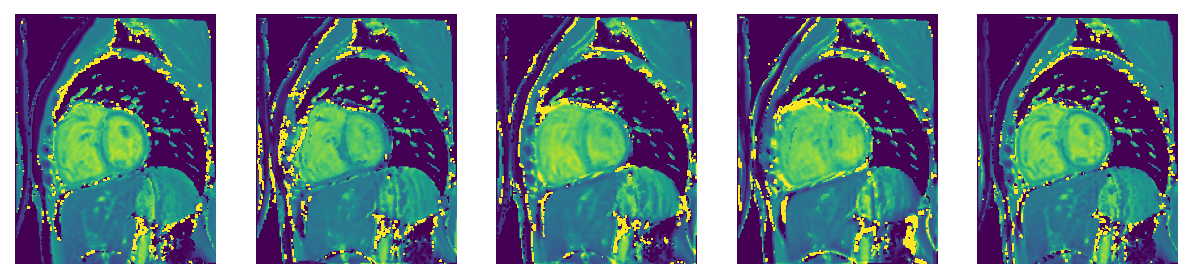

In [10]:
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(reged_ims_table)):
    plt.subplot(1,len(reged_ims_table),i+1)
    plt.axis('off')
    plt.imshow(reged_ims_table[i]['T1map'], vmax=2000, vmin=300)
plt.show()

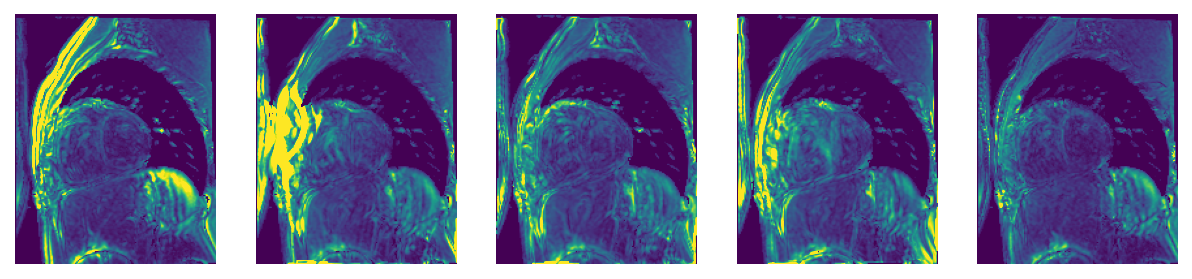

In [11]:
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(reged_ims_table)):
    plt.subplot(1,len(reged_ims_table),i+1)
    plt.axis('off')
    plt.imshow(reged_ims_table[i]['Errmap'], vmax=200, vmin=0)
plt.show()

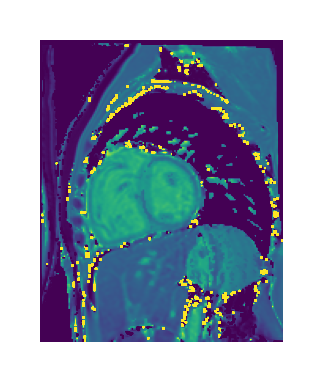

In [12]:
T1map = reged_ims_table[best_idx]['T1map']
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(T1map, vmax=2500, vmin=300)
plt.show()

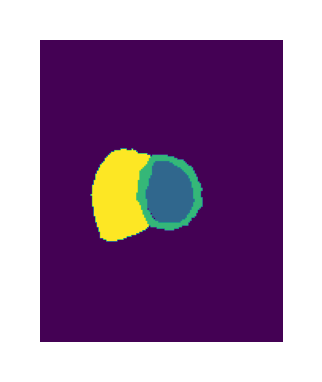

In [13]:
mask = predict_mask(T1map)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(mask, vmax=3, vmin=0)
plt.show()

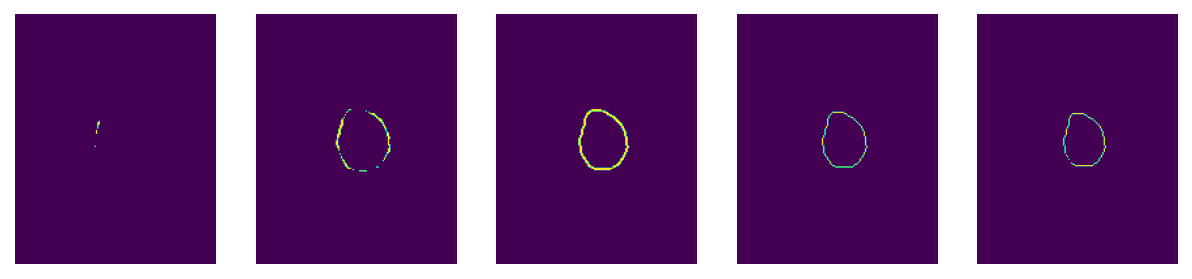

In [14]:
mask_layer = layering(mask, 5)
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(mask_layer)):
    plt.subplot(1,len(mask_layer),i+1)
    plt.axis('off')
    plt.imshow(mask_layer[i], vmax=1, vmin=0)
plt.show()

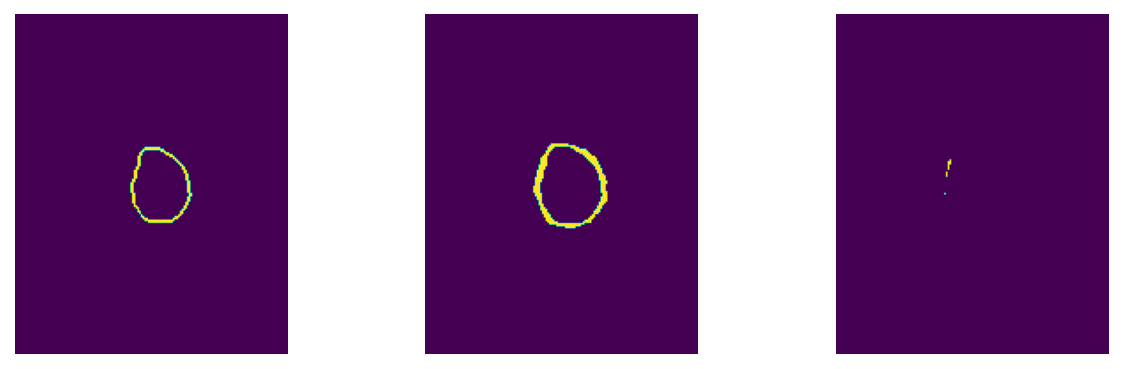

In [15]:
mask_layer = layering_percent(mask, 0.7, 0.3)
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(mask_layer)):
    plt.subplot(1,len(mask_layer),i+1)
    plt.axis('off')
    plt.imshow(mask_layer[i], vmax=1, vmin=0)
plt.show()

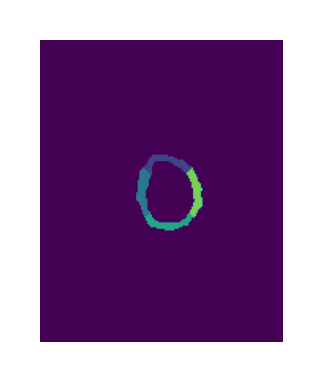

In [16]:
aha_seg = get_ahaseg(mask, nseg=4)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(aha_seg, vmax=5, vmin=0)
plt.show()

Be careful! <br>
I use same slice to simulate the data of all slices

In [17]:
data = get_aha17(mask, mask, mask, T1map, T1map, T1map)

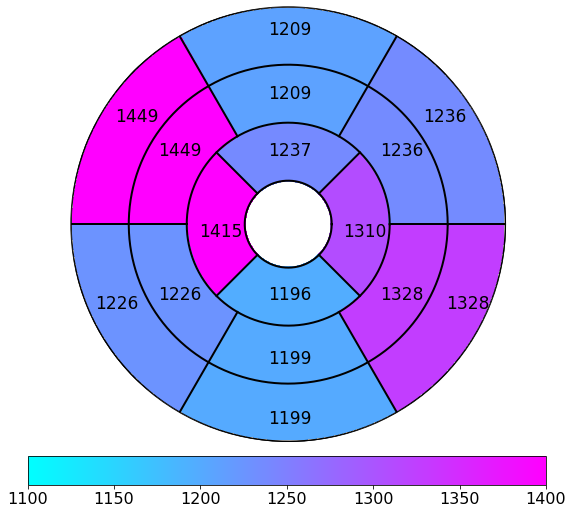

In [18]:
draw_aha17(data)